In [798]:
%cd Project2/

C:\Users\ADMIN\Desktop\Heuristic\Project2


In [50]:
import math 
import numpy as np 
import matplotlib.pyplot as plt 
import random

In [108]:
# N = 100
# n = 10
# decision_variables = 1
# ss = 0.5 
# prob_c = 0.60
# prob_m = 0.05

In [423]:
def population_gen(N,n,decision_variables):
    pop = []
    for i in range(decision_variables):
        x = [np.random.randint(2, size =n) for x in range(N)]
        y = [list(i) for i in x]
        pop.append(y)
        
#     print(y)
#     print(np.array(y).shape)
    return (pop)
# x = population_gen(N,n,2)
# print(x)

In [424]:
def bin2dec(a):
    obj_fun_val_pop = []
    for i, row in enumerate(a):
#         print("i,row",i,row)
        res = int("".join(str(x) for x in row), 2) 
#         print("The converted integer value is : " +  str(res))
        obj_fun_val_pop.append(str(res))
    return obj_fun_val_pop

In [840]:
def var_split(a):
    varaa = []
    for i in a:
        t = bin2dec(i)
        varaa.append(t)
#     print(varaa)
    return varaa

In [853]:
def decodemsg(lb,ub,n,dec):
    s = (ub - lb)/(2**n)
#     print(s)
    actual_con = []
    for i,num in enumerate(dec):
#         print(num)
        x = lb + s*int(num)
        actual_con.append(x)
    return actual_con

In [854]:
def decode_split(lb, ub, n, b2d): 
    deco_list = []
    tmp  = b2d
    r = []
    for i in tmp: 
#         print(i)
        r = decodemsg(lb,ub,n,i)
        deco_list.append(r)
#     print(deco_list)
    return deco_list

In [935]:
def decode_split_bnk(b2d): 
    deco_list = []
    r = []
    for i, lis in enumerate(b2d):
        if i == 0:
            r = decodemsg(0,5,10,lis)
            deco_list.append(r)
        if i == 1: 
            r = decodemsg(0,3,10,lis)
            deco_list.append(r)
    print("deco_list",np.array(deco_list).shape)
    return deco_list
# dd = decode_split_bnk(b2d)
# print(dd[1][0])

In [939]:
def decode_split_brake(b2d): 
    deco_list = []
    r = []
    for i, lis in enumerate(b2d):
        if i == 0:
            r = decodemsg(55,80,10,lis)
            deco_list.append(r)
        if i == 1:
            r = decodemsg(75,110,10,lis)
            deco_list.append(r)
        if i == 2: 
            r = decodemsg(1000,3000,10,lis)
            deco_list.append(r)
        if i == 3:
            x = decodemsg(2,20,10,lis)
            r = [int(i) for i in x]
            deco_list.append(r)
#     print(deco_list)
    return deco_list


In [431]:
def scaffer_function(deco_list): 
    tmp = deco_list
    f1 = []
    f2 = []
    for i in tmp[0]: 
        x1 = i**2 
        x2 = (i-2)**2
        f1.append(x1)
        f2.append(x2)
#     print(f1,f2)
    return f1,f2

In [432]:
def scaffer_function2(deco_list): 
    tmp = deco_list
    f1 = []
    f2 = []
    for i,x in enumerate(tmp[0]): 
        if x <= 1:
            x1 = -x
            f1.append(x1)
        elif x > 1 and x <= 3:
            x1 = x - 2
            f1.append(x1)
        elif x > 3 and x <= 4: 
            x1 = 4-x
            f1.append(x1)
        elif x > 4: 
            x1 = x - 4
            f1.append(x1)
        x2 = (x - 5)**2
        f2.append(x2) 
#     print(f1,f2)
    return f1, f2

In [979]:
def ZDT4_deco(b2d): 
    deco_list = []
    r = []
    for i, lis in enumerate(b2d):
        if i == 0:
            r = decodemsg(0,1,10,lis)
            deco_list.append(r)
        if i == 1: 
            r = decodemsg(-5,5,10,lis)
            deco_list.append(r)
#     print("deco_list",np.array(deco_list).shape)
    return deco_list

In [433]:
def ZDT1(deco_list):
    f1 = []
    f2 = []
    temp = deco_list
#     print("deco_list",deco_list)
    x = temp.pop(0)
    x2 = [sum(row[j] for row in temp) for j in range(len(temp[0]))]
#     print("x2",x2)
#     print("x2",x2)
    for i, element in enumerate(x):
        f_1 = element
        g = 1 + 0.3103*x2[i]
        f_2 = g * (1 - np.sqrt(element / g))
        f1.append(f_1)
        f2.append(f_2)
#     print(f1,f2)
    return f1, f2 

In [434]:
def ZDT2(dd):
    f1 = []
    f2 = []
    temp = dd
    x = temp.pop(0)
    x2 = [sum(row[j] for row in temp) for j in range(len(temp[0]))]
#     print("x2",x2)
    for i, element in enumerate(x):
        f_1 = element
        g = 1 + 0.3103*x2[i]
        f_2 = g * (1 - (element / g)**2) 
        f1.append(f_1)
        f2.append(f_2)
#     print(f1,f2)
    return f1, f2 

In [435]:
def ZDT3(dd):
    f1 = []
    f2 = []
    temp = dd
    x = temp.pop(0)
    x2 = [sum(row[j] for row in temp) for j in range(len(temp[0]))]
#     print("x2",x2)
    for i, element in enumerate(x):
        f_1 = element
        g = 1 + 0.3103*x2[i]
        f_2 = g * (1 - np.sqrt(element / g) - ((element / g)* (math.sin(10 * math.pi * f_1))))
        f1.append(f_1)
        f2.append(f_2)
#     print(f1,f2)
    return f1, f2 

In [966]:
def ZDT4(dd):
    f1 = []
    f2 = []
    temp = dd
    x = temp.pop(0)
    x2 = [sum(row[j] for row in temp) for j in range(len(temp[0]))]
#     print("x2",x2)
    for i, element in enumerate(x):
        f_1 = element
        g = 91 + (x2[i])**2 + 10 * math.cos(4*math.pi*x2[i])
        f_2 = g * (1 - np.sqrt(f_1 / g))
        f1.append(f_1)
        f2.append(f_2 -100)
#     print(f1,f2)
    return f1, f2 

In [657]:
def ZDT6(dd):
    f1 = []
    f2 = []
    temp = dd
    x = temp.pop(0)
    x2 = [sum(row[j] for row in temp) for j in range(len(temp[0]))]
#     print("x2",x2)
    for i, element in enumerate(x):
        f_12 = element
        f_1 = 1 - math.exp(-1 * 4 * f_12) * (math.sin(6 * math.pi * f_12))**6 
        g = 1 + 9*((x2[i] / 9)**0.25)
        f_2 = g * (1 - (f_1 / g)**2) 
        f1.append(f_1)
        f2.append(f_2 -5)
#     print(f1,f2)
    return f1, f2 

In [438]:
def bnk(dd): # Binh and Korn Function Use split_bnk decoder with this function. 
    tmp = dd 
    f1,f2 = [],[]
    for i, element in enumerate(tmp[0]): 
        g1,g2,x1,x2 = 0,0,0,0
        g1 = (element - 5)**2 + (tmp[1][i]) **2
        g2 = (element - 3)**2 + (tmp[1][i] + 3)**2 
        x1 = 4 * (element)**2 + 4 * (tmp[1][i])**2 
        x2 = (element - 5)**2 + (tmp[1][i] - 5)**2
        if g1 <= 25 and g2 >= 7.7: 
            f1.append(x1)
            f2.append(x2)
        else: 
            f1.append(x1 + 100)
            f2.append(x2 + 100)
#     print("dd",dd)
#     print(f1,f2)
    return f1,f2

In [439]:
def brake_problem(dd): 
    tmp = dd
    f1,f2 = [], []
    for i, item in enumerate(tmp[0]):
        g1,g2,g3,g4,g5,x1,x2 = 0,0,0,0,0,0,0
        g2 = 2.5 * (tmp[3][i] + 1) - 30
        g3 = tmp[2][i]/(math.pi * (tmp[1][i]**2 - item**2)) - 0.4
        g4 = ((0.00222 * tmp[2][i] * (tmp[1][i]**3 - item**3))/(tmp[1][i]**2 - item**2)**2) - 1
        g5 = 900 - ((0.0266 * tmp[2][i] * tmp[3][i] * (tmp[1][i]**3 - item**3))/(tmp[1][i]**2 - item**2))
        x1 = 4.9 * math.pow(10, -5) * (tmp[1][i]**2 - item**2) * (tmp[3][i] - 1)
        x2 = (9.82 * math.pow(10, 6) * (tmp[1][i]**2 - item**2))/(tmp[2][i] * tmp[3][i] * (tmp[1][i]**3 - item**3))
        if g1 <= 0 and g2 <= 0 and g3 <=0 and g4 <=0 and g5 <=0 : 
            f1.append(x1)
            f2.append(x2)
        else: 
            f1.append(x1+100)
            f2.append(x2+100)
#     print("dd",dd)
#     print(f1, f2)
    return f1, f2

In [440]:
def rank_cal(f1,f2):
    ns = 0
    rnk = 0
    rank = []
    for x, i in enumerate(f1):
        ns = 0
        rnk = 0
        for y,j in enumerate(f1): 
            if ((i >= j) and (f2[x] >= f2[y])) and ((i > j) or (f2[x] > f2[y])):
                ns += 1
        rnk = 1 + ns
        rank.append(rnk)
#     print(rank)
    m = max(rank)
    return rank

In [859]:
def final_rank_cal(f1,f2):
    ns = 0
    rnk = 0
    rank = []
    f1_rank, f2_rank = [], []
    for x, i in enumerate(f1):
        ns = 0
        rnk = 0
        for y,j in enumerate(f1): 
            if ((i >= j) and (f2[x] >= f2[y])) and ((i > j) or (f2[x] > f2[y])):
                ns += 1
        rnk = 1 + ns
        if rnk == 1: 
            f1_rank.append(i)
            f2_rank.append(f2[y])
        rank.append(rnk)
#     print(rank)
    m = max(rank)
    return rank, f1_rank, f2_rank

In [441]:
def avg_fitness_val(rank):
    sume = 0
    avg_fit = []
    avg_fit_re = []
    temp_r = rank
#     print(temp_r)
    s = temp_r
    my_dict = {i:s.count(i) for i in range(1,max(s)+1)}
#     print(my_dict)
    for k in my_dict.keys():
        d = my_dict[k]
        if k > 1: 
    #         print(k)
            sume = sum(my_dict[i] for i in range(1, k))
    #         print("sume",sume)
            ff = 10 - sume -0.5*(d - 1)
            avg_fit.append(ff)
        else: 
            ff = 10 - 0.5*(d-1)
            avg_fit.append(ff)

    for j in temp_r:
    #     print("e",e)
        for n,e in enumerate(my_dict.keys()):
    #         print("j",j)
            if e == j:
                m = avg_fit[n]
                avg_fit_re.append(m)
#     print(avg_fit)
#     print(avg_fit_re)
#     print(temp_r)
    return avg_fit_re

In [537]:
def fitness(avg_fit, rank,f1,f2, ss):
    tmp_avg = avg_fit
    tmp_rank = rank
    tmp_f1 = f1
    tmp_f2 = f2
    h = 0
    shr_fit = []
    scaled_fit = []
    nico = []
    for n,i in enumerate(tmp_rank):
        d = 0
        nc = 0
        dij = []
        for m,j in enumerate(tmp_rank):
            if i ==j and n == m: 
                d = 1
                dij.append(d)
            if i == j and n != m:
                d = np.sqrt((f1[n] - f1[m]/1)**2 + (f2[n] - f2[m]/1)**2)
                if d < ss: 
                    d = 1 - d/ss
                elif d > ss: 
                    d = 0
                dij.append(d)
        for k in dij: 
            nc +=k
        nico.append(nc)
#     print(nico)

    for e in range(N):
        h = tmp_avg[e]/nico[e]
        shr_fit.append(h)
#     print(shr_fit)  

    for num, ele in enumerate(tmp_rank):
        sumee = 0 
        c = 0
        for n, l in enumerate(tmp_rank): 
            if ele == l: 
                sumee += shr_fit[n]
                c += 1
        if sumee == 0:
            sumee = 1
        scf = shr_fit[num] * (tmp_avg[num] * c / sumee)
        scaled_fit.append(scf)
    return scaled_fit

In [443]:
def combine_string(pop):
    a = pop
    combine = []
    for i in range(len(a[0])):
        c = []
        for j in range(len(a)):
            c = c + a[j][i]
        combine.append(c)
#     print(combine)
    return combine

In [444]:
def split_strings(combine, N, n):
    spliti = []
    likea = []
    donea = []
    for i in range(0,len(combine[0]),n):
        c = []
        for j in range(len(combine)):
            c = combine[j][i:i+n]
            spliti.append(c)
#     print(spliti)
    # print(spliti)
    for i in range(0,len(spliti), N):
        likea = spliti[i:i+N]
        donea.append(likea)
#     print(donea)
    return donea

In [445]:
def Rand(start, end, num): 
    res = [] 
  
    for j in range(num): 
        res.append(random.randint(start, end)) 
  
    return res

In [446]:
# #############################################3 1st #################################################
# def srws(fit_val, pop_a):
# #     print(len(fit_val))
#     pro_ar = []
#     a = pop_a
# #     print()
#     mating_par = []
# #     mating_par1 = []
#     pi_old = 0
#     for i in fit_val:
#         if sum(fit_val) == 0:
#             pi = 1/len(fit_val)
#         else:
#             pi = float(i)/float(sum(fit_val))
#         pro_ar.append(pi_old + pi*360)
#         pi_old += pi*360
#     print("pro_arr",pro_ar)
#     c = []
#     x = Rand(0,360,len(fit_val))
#     print("x",x)
# #     print("Length of x",len(x))
#     count = 0
#     for i in range(len(x)):
#         for j in range(len(pro_ar)):
# #             print("element in x",x[i])
#             if x[i] == 360:
#                 x[i] = 359.5
#             if x[i] < pro_ar[j]:
#                 print("X and element", x[i],pro_ar[j])
#                 mating_par.append(a[j])
#                 count += 1
#                 break
#             else: 
#                 continue
#     print("count",count)
#     print("size of fit_val, Pro_ar, mating_par, a", len(fit_val), len(pro_ar), len(mating_par), len(a))
#     assert len(mating_par) == len(a)
#     return mating_par

In [447]:
def srws(fit_val, pop_a):
#     print(len(fit_val))
    pro_ar = []
    a = pop_a
#     print()
    mating_par = []
#     mating_par1 = []
    pi_old = 0
    for i in fit_val:
        if sum(fit_val) == 0:
            pi = 1/len(fit_val)
        else:
            pi = float(i)/float(sum(fit_val))
        pro_ar.append(pi_old + pi*360)
        pi_old += pi*360
#     print(pro_ar)
    c = []
    x = Rand(0,360,len(fit_val))
#     print(x)
    for i in range(len(x)):
        for j in range(len(pro_ar)): 
            if x[i] == 360:
                x[i] = 359.25
            if x[i] < pro_ar[j]:
                mating_par.append(a[j])
#                 mating_par.append(a[j])
#                 mating_par1.append(b[j])
                break
            else: 
                continue
#     c = concatenate_list(mating_par, mating_par1)
#     print(mating_par)
    return mating_par

# mating_par = srws(fit_, pop)
# print(mating_par)

In [495]:
def two_point_crossover(mating_pool, prob_c = 0.80):  #mating pool from roulette wheel and crossover probability goes into this. default is 0.80
    if np.random.rand() < prob_c:
        offspring_pool = []
        x = mating_pool
        a = random.randint(1, len(x[0])/2)
        b = random.randint(len(x[0])/2, len(x[0]))
        if a == b:
#             print("violated")
            a = random.randrange(0, len(x[0]),2)
            b = random.randrange(0, len(x[0]),2)
#         print(a,b)

        for i in x:
            r = random.sample(x, 2)
#             print("r",r)
            r[0][a:b] = r[-1][a:b] 
            r[-1][a:b] = r[0][a:b]
            new_child_0 = r[0]
            new_child_1 =  r[-1]
            if len(x) > len(offspring_pool):
                offspring_pool.append(new_child_0)
                if len(x) < len(offspring_pool):
                    offspring_pool.append(new_child_1)

    else: 
        offspring_pool = mating_pool
#     print("offspring_pool", offspring_pool)
    return offspring_pool

In [488]:
def mutation(offspring_pool, prob_m):
    x = offspring_pool
#     print("mutation",len(x))
    d = np.random.rand()
#     print(d)
    if d < prob_m: 
        p =np.random.randint(len(x[0])-1)
#         print(p)
        k = x[p]
#         print(k[p])
        k[p] = 1 if k[p] == 0 else 0
#         print(type(x))
    return x

pop (2, 80, 10)
pop (2, 80, 10)
pop (2, 80, 10)
pop (2, 80, 10)
pop (2, 80, 10)
pop (2, 80, 10)
pop (2, 80, 10)
pop (2, 80, 10)
pop (2, 80, 10)
pop (2, 80, 10)
best (0.01171875, 0.1417553150910899)


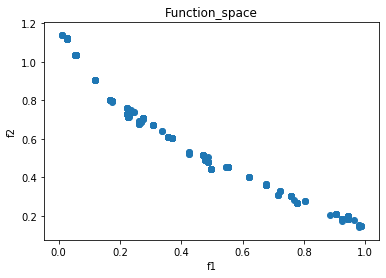

In [1001]:
import itertools
N = 80
n = 10
decision_variables = 2
ss = 0.5 
prob_c = 0.85
prob_m = 0.01
# def main(): 
run = 0
final_pop = []
final_f1 = []
final_f2 = []
while run < 10:
    pop = population_gen(N,n,decision_variables)
    print("pop",np.array(pop).shape)
    final_1, final_2 = [],[]
    v = 0
    while v < 10:
        b2d = var_split(pop)
        decode = decode_split(0,1,n,b2d)
        f1,f2 = ZDT1(decode)
#         print(np.array(f1).shape,np.array(f2).shape)
        rank = rank_cal(f1,f2)
        avg_fitne = avg_fitness_val(rank)
#         print("average fitness", np.array(avg_fitne).shape)
        scaled_fit = fitness(avg_fitne, rank, f1,f2,ss)
#         print("scaled_fit", np.array(scaled_fit).shape)
        combine = combine_string(pop)
#         print("combine", np.array(combine).shape)
        mating_pool = srws(scaled_fit, combine)
#         assert len(mating_pool) == len(pop)
#         print("mating_pool",np.array(mating_pool).shape)
        crossover = two_point_crossover(mating_pool, prob_c)
#         print("Crossover",np.array(crossover).shape)
        mut = mutation(crossover, prob_m)
#         print("Mutation",np.array(mut).shape)
        child = split_strings(mut, N, n)
#         print("child",np.array(child).shape)
        pop = child
        final_1.append(f1)
        final_2.append(f2)
        v += 1
#     print("f1",final_1)
#     print("f2",final_2)
#     with open("ZDT1", "w") as outfile:
#         outfile.write("\n".join(str(i) for i in tme2)) 
    final_f1.append(f1)
    final_f2.append(f2)
    with open("ZDT4.txt", "w") as outfile:
        outfile.write("\n, F1 values, \n".join(str(i) for i in final_f1)) 
        outfile.write("\n,  F2, values, \n".join(str(i) for i in final_f2))
    run += 1
x1 = list(itertools.chain.from_iterable(final_f1))
x2 = list(itertools.chain.from_iterable(final_f2))
gg = plt.figure()
# plt.scatter(final_1,final_2)
plt.scatter(x1,  x2)
plt.xlabel('f1')
plt.ylabel('f2')
plt.title('Function_space')
# plt.axis([0,2,0,2])
gg.savefig('ZDT4.jpg', format='jpg', dpi=1000)
best_value = (min(x1), min(x2))
print("best",best_value)
# r, y1, y2 = final_rank_cal(x1,x2)
# plt.scatter(y1,y2)

In [1002]:
print(decode)
print(min(decode[0]))

[[0.9853515625, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9853515625, 0.9892578125, 0.9853515625, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9853515625, 0.9892578125, 0.9892578125, 0.9853515625, 0.9853515625, 0.9853515625, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9892578125, 0.9853515625, 0.9892578125, 0.9892578125, 0.9853515625, 0.9853515625, 0.9892578125, 0.9892578125, 0.9892578125, 0.9853515625, 0.9892578125, 0.9892578125, 0.9853515625, 0.9892578125, 0.9853515625, 0.9892578125, 0.9892578125, 0.9892578125, 0.9853515625, 0.9853515625, 0.9892578125, 0.9853515625, 0.9853515625, 0.9892578125, 0.9892578125, 0.9892578125, 0.98

pop (2, 100, 10)


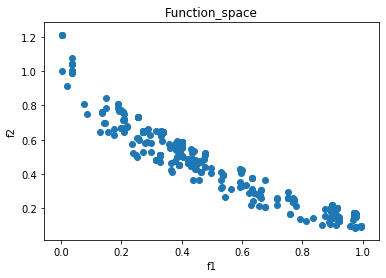

In [836]:
main()


In [668]:
k = 0
while k < 10: 
    main()

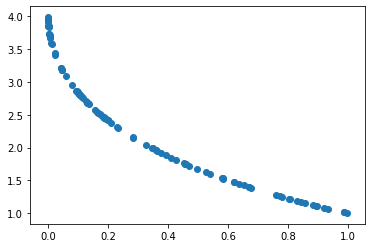

In [318]:
plt.scatter(f1,f2)